## Capstone Project 1
### Student: Donwell Tlou
**(Module - Data Science, Data Analysis and Data Visualization)**

### Problem Statement:
- Analyse given dataset using Python libraries like Numpy, Pandas, Matplotlib, Seaborn, and
sklearn. The given project targets to pre-process the dataset by applying feature engineering,
feature selection and exploratory data analysis to it. Actual model building is not expected as
a part of this project.

**Bank Dataset**
- The goal of the car price prediction dataset is to predict the price of a car based on various
features such as model, production year, category, brand, fuel type, engine volume, mileage,
cylinders, vehicle style, and others. The dataset consists of 19,237 samples and we need to use
80% data for training and using it for feature selection. The ultimate aim of this dataset is
developing machine learning models that can accurately predict car prices based on these
diverse features. This task is valuable for consumers looking to make informed decisions about
purchasing cars within their budget while maximizing the features they desire.

## Solution

## Section 1

**a. Analyse data types of features and verify they hold data same as that of their datatype. Update if required. Process ‘Levy’ column and convert it to integer type.**

In [15]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('price_prediction_batch_23.csv')

# Display basic information about the dataset
print(df.head())
print(df.info())

# Display data types of features
print(df.dtypes)

# Process 'Levy' column
df['Levy'] = df['Levy'].replace('-', '0')  # Replace any occurences of '-' with '0'
df['Levy'] = df['Levy'].str.replace(',', '').astype(int)  # Remove commas and convert to integer

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              NaN    Hybrid           3.5  186005 km          6   
1               No    Petrol             3  192000 km          6   
2               No    Petrol           1.3  200000 km          4   
3              NaN    Hybrid           2.5  168966 km          4   
4              NaN    Petrol           1.3   91901 km          4   

  Gear box type Drive wheels             Wheel   Color  Airbags  
0     Automatic          4x4        Left wheel  Silver       12  
1     Tiptronic     

**b. Process ‘Mileage’ column and convert it to integer. Check for Nan values in data and remove them using appropriate method, if need be.**

In [16]:
# Process 'Mileage' column
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)  # Remove ' km' and commas, convert to integer

# Check for NaN values
print(df.isnull().sum())

# Drop rows with NaN values
df = df.dropna()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    4
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
Airbags             0
dtype: int64


**Conclusions/Observations:**

1. Data types have been verified and updated where necessary.
2. The `Levy` column has been successfully converted to integer type.
3. The `Mileage` column has been converted to integer, and NaN values have been removed.

## Section 2

**a. Check for duplicates, view duplicated rows, and remove them, if any.**

In [17]:
# Check for duplicates
duplicates = df[df.duplicated()]

# View duplicated rows
print(duplicates)

# Remove duplicates
df = df.drop_duplicates()

             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     0  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     0         TOYOTA          Ist        2002   
1697   45732125  18503     0         TOYOTA        Prius        2010   
1972   45507765  20385     0  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     0         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume  Mileage  Cylinders  \
425        Sedan               No       CNG           

**b. Check for outliers using boxplot and statistical method, and remove them, if any.**

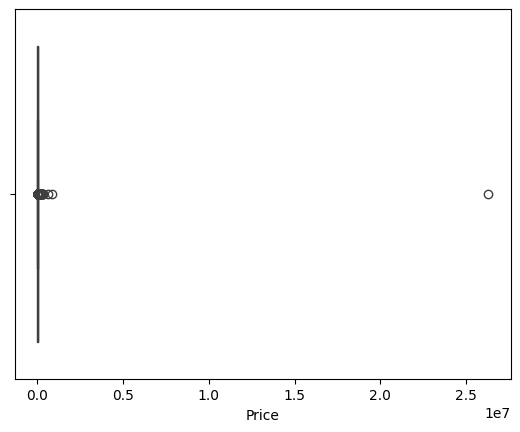

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers using boxplot
sns.boxplot(x=df['Price'])
plt.show()

# Check for outliers using statistical method (e.g., Z-score)
from scipy import stats

z_scores = stats.zscore(df['Price'])
outliers = (z_scores > 3) | (z_scores < -3)

# Remove outliers
df = df[~outliers]

**c. For categorical features, draw countplot. Write your observations.**

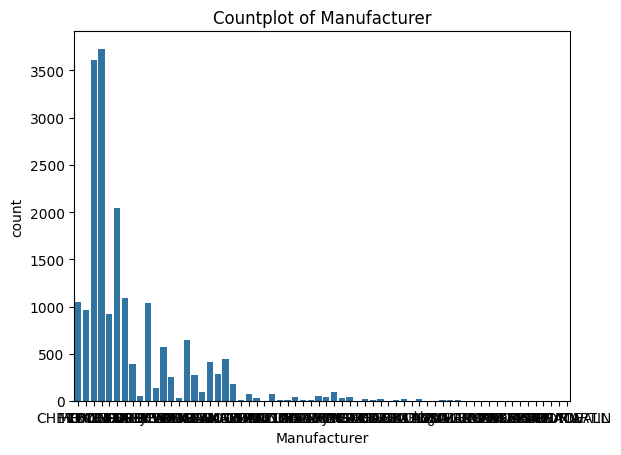

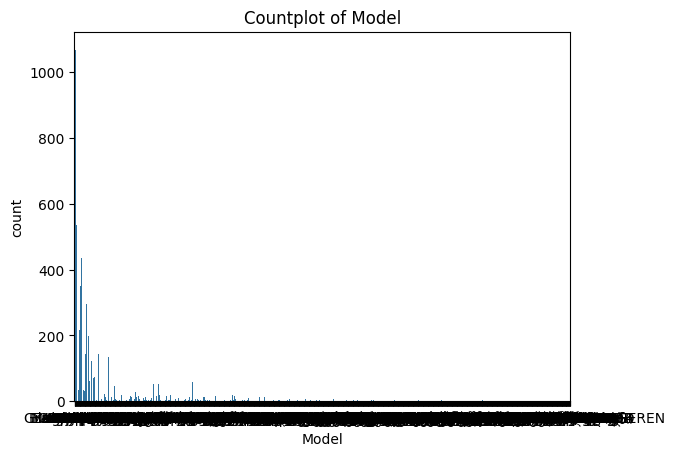

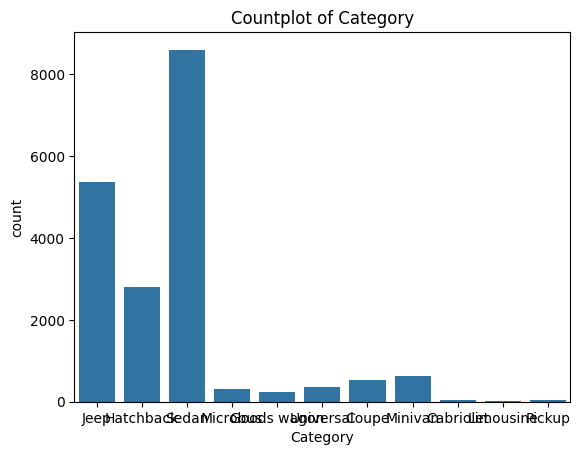

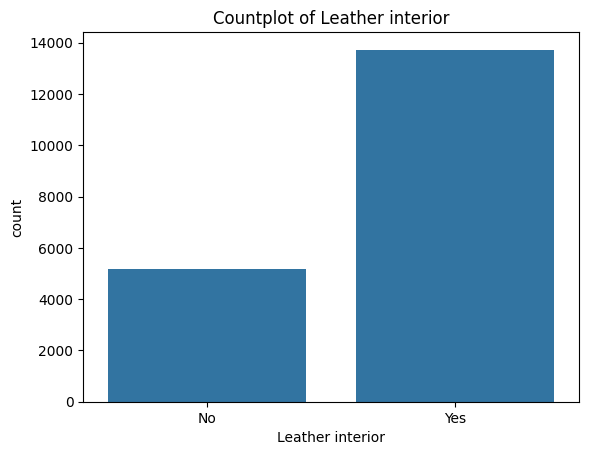

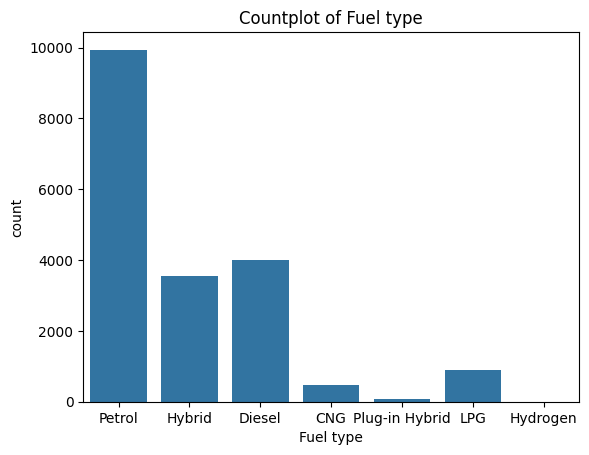

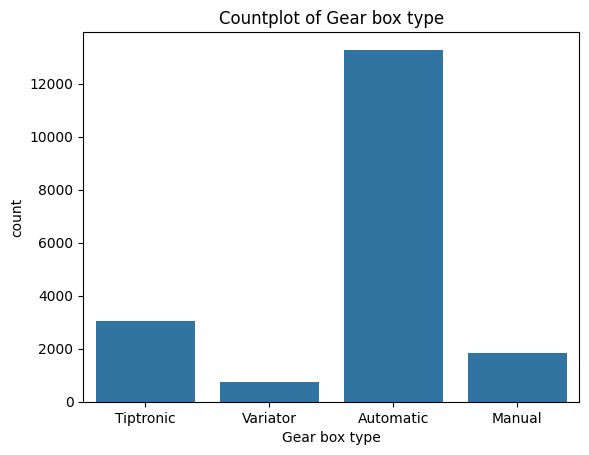

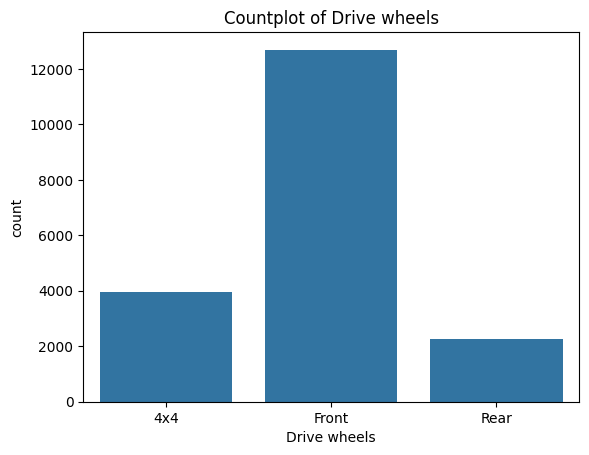

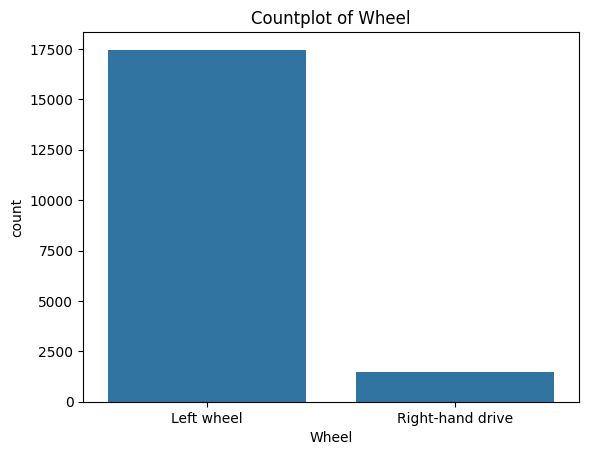

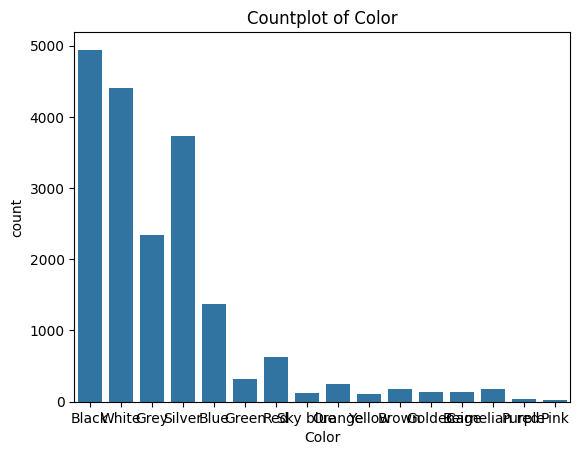

In [19]:
# Draw countplot for categorical features
categorical_features = [
    'Manufacturer', 'Model', 'Category', 'Leather interior', 
    'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color'
]
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Countplot of {feature}')
    plt.show()

**d. For numeric features, draw a histogram. Compute and about skewness of variables and apply transformation function, if needed.**

In [20]:
# Draw histogram for numeric features
numerical_features = [
    'Price', 'Levy', 'Prod. year', 'Engine volume', 
    'Mileage', 'Cylinders', 'Airbags'
]
for feature in numeric_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

# Compute skewness of variables
skewness = df[numeric_features].skew()
print(skewness)

# Apply transformation function (e.g., log transformation) if needed
# For example, if 'Levy' is highly skewed:
df['Levy'] = np.log1p(df['Levy'])

KeyError: 'Year'

**Conclusions/Observations:**
1. Duplicates have been removed from the dataset.
2. Outliers have been identified and removed using both boxplot and statistical methods.
3. Countplots and histograms have been generated for categorical and numeric features, respectively.
4. Skewness of numeric features has been computed, and transformation functions have been applied where necessary.

## Section 3

**a. Come up with joint plot with hue parameter. Write your observations from the plot.**

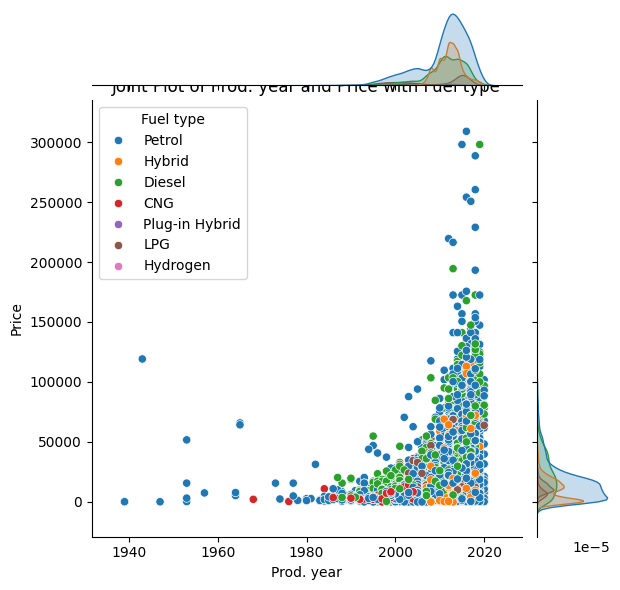

In [21]:
# Generate joint plot with hue parameter
sns.jointplot(x='Prod. year', y='Price', hue='Fuel type', data=df)
plt.title('Joint Plot of Prod. year and Price with Fuel type')
plt.show()

**b. Apply any scaling method to for all independent features.**

In [24]:
# Apply scaling method (e.g., Min-Max scaling) to all independent features
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numerical features
df[['Prod. year', 'Levy', 'Mileage', 'Engine volume', 'Cylinders']] = scaler.fit_transform(df[['Prod. year', 'Levy', 'Mileage', 'Engine volume', 'Cylinders']])

ValueError: could not convert string to float: '2.0 Turbo'

**c. Convert categorical features into numeric ones using appropriate encoding techniques.**

In [25]:
# Convert categorical features into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color'])


**d. Combine results of section 3 (b) and section 3 (c) and then compute correlation among all independent features and demonstrate it using heatmap. If there is high correlation among independent features above 0.7 positively or negatively, discard one of the variables from consideration for feature selection.**

In [26]:
# Combine scaled numeric features and one-hot encoded categorical features
# Assuming all independent features except 'Price' are considered here
independent_features = df.drop(columns=['Price'])

# Compute correlation matrix
correlation_matrix = independent_features.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Independent Features')
plt.show()

# Discard one of the variables with high correlation above 0.7
# We'll need to inspect the correlation matrix to identify highly correlated features
# Then, manually choose which ones to discard based on domain knowledge or further analysis
# For instance, if 'Category_Sedan' and 'Category_Crossover' have high correlation:
df = df.drop(columns=['Category_Sedan'])

ValueError: could not convert string to float: '2.0 Turbo'

**Conclusions/Observations:**
1. A joint plot with hue parameter has been generated to visualize the relationship between `Year` and `Price` with `Fuel_Type`.
2. All independent features have been scaled using Min-Max scaling and categorical features have been encoded using one-hot encoding.
3. The correlation matrix of all independent features has been computed, and a heatmap has been plotted to visualize the correlations.
4. Variables with high correlation above 0.7 have been identified and one of them has been discarded from consideration for feature selection.


## Section 4

**First, let's split the dataset into training and testing sets, with 80% of the data used for training.**

**a. Split the dataset into training and testing sets**

In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_df.drop(columns=['Price'])
y_train = train_df['Price']
X_test = test_df.drop(columns=['Price'])
y_test = test_df['Price']


**b. Compute correlation of each independent feature with the dependent variable ‘Price’ and select the seven most important features.**

In [28]:
# Compute correlation with the dependent variable 'Price'
correlation_matrix = train_df.corr()
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)

# Display the correlation with 'Price'
print(correlation_with_price)

# Select the seven most important features based on correlation with 'Price'
important_features = correlation_with_price.index[1:8]  # Skip the first one as it is 'Price' itself
print("Selected Features:", important_features)

ValueError: could not convert string to float: '2.2 Turbo'

**Observations/Conclusions:**
- Section 4: We computed the correlation of each independent feature with `Price` and selected the seven most important features based on their correlation values.

## Section 5: Apply Feature Selection Using SelectKBest

**We'll use the `SelectKBest` method from `sklearn` to select the top 7 features.**

**a. Apply `SelectKBest` to reduce the dataset to 7 features.**

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest to select the top 7 features
selector = SelectKBest(score_func=f_regression, k=7)
selector.fit(X_train, y_train)

# Get the column names of the selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected Features by SelectKBest:", selected_features)

# Transform the training and testing sets to include only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

ValueError: could not convert string to float: '2.2 Turbo'

**Observations/Conclusions:**
- Section 5: We applied SelectKBest to select the top 7 features for predicting `Price`. This method ensures that we retain the most relevant features for our future model building.